<a href="https://colab.research.google.com/github/dnz-s/Sentiment-Analysis-First_Attempt/blob/main/Sentiment_Analysis_Tweets_with_bert_base_turkish.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import os
import pandas as pd
from warnings import filterwarnings
filterwarnings('ignore')
import numpy as np
import matplotlib.pyplot as plt
import csv
from openpyxl import Workbook
from pandas import Series, DataFrame
from datetime import datetime
import seaborn as sns
from scipy import stats
from PIL import Image
from warnings import filterwarnings
filterwarnings('ignore')
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

SNScrape

In [4]:
pip install snscrape

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 59 kB 3.2 MB/s 


In [11]:
import snscrape.modules.twitter as sntwitter
import pandas

# Creating list to append tweet data to
tweets_list2 = []

for i,tweet in enumerate(sntwitter.TwitterSearchScraper('adese since:2022-12-18 until:2022-12-22').get_items()):
    if i>5000:
        break
    tweets_list2.append([tweet.content, tweet.date, tweet.user.username])
# Creating a dataframe from the tweets list above 
Tweets_df = pd.DataFrame(tweets_list2, columns=['tweet', 'date', 'username'])

In [12]:
Tweets_df

,tweet,date,username
0,"#adese,Asaf 3 istanbul A.Ş kısmi bölünerek ser...",2022-12-21 22:02:51+00:00,48Borsa001
1,@Serkan_trade @teknikmaan @sahimdeliolma @mrdh...,2022-12-21 21:48:12+00:00,adese4458
2,İyi geceler !Paraya boğulacağız ! Dedeye inan ...,2022-12-21 21:30:54+00:00,BuffettDede
3,@EconomistAdam #petkm \n#AKGRT \n#mobtl \n#ade...,2022-12-21 20:55:53+00:00,Bahadirzeren191
4,#adese dolar bazlı liner çizim. Hala daha coin...,2022-12-21 20:53:35+00:00,sihirbaz_krpto
...,...,...,...
892,@mrboboskie Messi all the way,2022-12-18 04:24:35+00:00,AkewusolaAdese1
893,@TunjiTonic @DotPayAfrica @KafilatOla Lol,2022-12-18 04:17:34+00:00,AkewusolaAdese1
894,@wachigbue @jimidisu Same here.,2022-12-18 04:14:23+00:00,AkewusolaAdese1
895,"LFG, GOOD PROJECT AND STRONG!! \nhttps://t.co/...",2022-12-18 04:00:26+00:00,adese1303


In [13]:
tweets_base=Tweets_df.filter(items=['tweet'])
df_Tweets = pd.DataFrame(tweets_base)
print(len(df_Tweets))

897


In [14]:
#noktalama işaretleri
df_Tweets["tweet"] = df_Tweets["tweet"].str.replace('[^\w\s]','')
# #sayılar
df_Tweets["tweet"]= df_Tweets["tweet"].str.replace('\d','')
tweets_base["tweet"]= tweets_base["tweet"].str.replace('(?:\@|http?\://|https?\://|www\S+)','')
df_Tweets["tweet"]= df_Tweets["tweet"].str.replace('@[A-Za-z0-9]+','')
df_Tweets["tweet"] =df_Tweets["tweet"].str.replace('http\S+','')

In [15]:
df_Tweets["tweet"]

0      adeseAsaf  istanbul AŞ kısmi bölünerek sermaye...
1      Serkan_trade teknikmaan sahimdeliolma mrdhsyn ...
2      İyi geceler Paraya boğulacağız  Dedeye inan  \...
3      EconomistAdam petkm \nAKGRT \nmobtl \nadese  b...
4      adese dolar bazlı liner çizim Hala daha coin f...
                             ...                        
892                         mrboboskie Messi all the way
893               TunjiTonic DotPayAfrica KafilatOla Lol
894                         wachigbue jimidisu Same here
895    LFG GOOD PROJECT AND STRONG \n airdrop giveawa...
896    Verdiğimiz hedefler uzun vadeli hedefler  Bu g...
Name: tweet, Length: 897, dtype: object

In [16]:
text = " ".join(review for review in df_Tweets.tweet)
print ("There are {} words in the combination of all review.".format(len(text)))

There are 97897 words in the combination of all review.


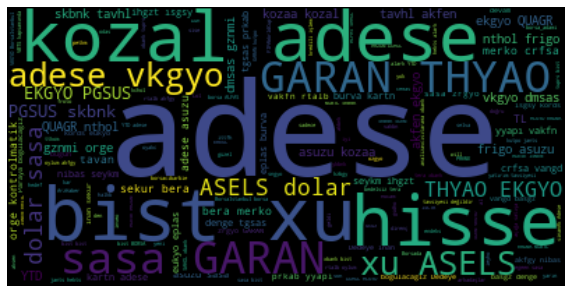

In [17]:
stopwords = set(STOPWORDS)
stopwords.update(["ben", "sen", "biz", "de", "ki", "ve", "da", "bir", "ile", "için", "bu", "ne", "gibi","amk", "a", "acaba", "altı", "altmış", "ama", "ancak", "arada", "artık", "asla", "aslında", "aslında", "ayrıca", "az", "bana", "bazen", "bazı", "bazıları", "belki", "ben", "benden", "beni", "benim", "beri", "beş", "bile", "bilhassa", "bin", "bir", "biraz", "birçoğu", "birçok", "biri", "birisi", "birkaç", "birşey", "biz", "bizden", "bize", "bizi", "bizim", "böyle", "böylece", "bu", "buna", "bunda", "bundan", "bunlar", "bunları", "bunların", "bunu", "bunun", "burada", "bütün", "çoğu", "çoğunu", "çok", "çünkü", "da", "daha", "dahi", "dan", "de", "defa", "değil", "diğer", "diğeri", "diğerleri", "diye", "doksan", "dokuz", "dolayı", "dolayısıyla", "dört", "e", "edecek", "eden", "ederek", "edilecek", "ediliyor", "edilmesi", "ediyor", "eğer", "elbette", "elli", "en", "etmesi", "etti", "ettiği", "ettiğini", "fakat", "falan", "filan", "gene", "gereği", "gerek", "gibi", "göre", "hala", "halde", "halen", "hangi", "hangisi", "hani", "hatta", "hem", "henüz", "hep", "hepsi", "her", "herhangi", "herkes", "herkese", "herkesi", "herkesin", "hiç", "hiçbir", "hiçbiri", "i", "ı", "için", "içinde", "iki", "ile", "ilgili", "ise", "işte", "itibaren", "itibariyle", "kaç", "kadar", "karşın", "kendi", "kendilerine", "kendine", "kendini", "kendisi", "kendisine", "kendisini", "kez", "ki", "kim", "kime", "kimi", "kimin", "kimisi", "kimse", "kırk", "madem", "mi", "mı", "milyar", "milyon", "mu", "mü", "nasıl", "ne", "neden", "nedenle", "nerde", "nerede", "nereye", "neyse", "niçin", "nin", "nın", "niye", "nun", "nün", "o", "öbür", "olan", "olarak", "oldu", "olduğu", "olduğunu", "olduklarını", "olmadı", "olmadığı", "olmak", "olması", "olmayan", "olmaz", "olsa", "olsun", "olup", "olur", "olur", "olursa", "oluyor", "on", "ön", "ona", "önce", "ondan", "onlar", "onlara", "onlardan", "onları", "onların", "onu", "onun", "orada", "öte", "ötürü", "otuz", "öyle", "oysa", "pek", "rağmen", "sana", "sanki", "sanki", "şayet", "şekilde", "sekiz", "seksen", "sen", "senden", "seni", "senin", "şey", "şeyden", "şeye", "şeyi", "şeyler", "şimdi", "siz", "siz", "sizden", "sizden", "size", "sizi", "sizi", "sizin", "sizin", "sonra", "şöyle", "şu", "şuna", "şunları", "şunu", "ta", "tabii", "tam", "tamam", "tamamen", "tarafından", "trilyon", "tüm", "tümü", "u", "ü", "üç", "un", "ün", "üzere", "var", "vardı", "ve", "veya", "ya", "yani", "yapacak", "yapılan", "yapılması", "yapıyor", "yapmak", "yaptı", "yaptığı", "yaptığını", "yaptıkları", "ye", "yedi", "yerine", "yetmiş", "yi", "yı", "yine", "yirmi", "yoksa", "yu", "yüz", "zaten", "zira", "zxtest"])

wordcloud = WordCloud(stopwords=stopwords, background_color="black").generate(text)
plt.figure(figsize=[10,10])
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

plt.show()

Duygu Analizi & Bert Modellerinin Yüklenmesi

In [19]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 5.8 MB 4.8 MB/s 
     |████████████████████████████████| 182 kB 60.0 MB/s 
     |████████████████████████████████| 7.6 MB 60.6 MB/s 


In [20]:
from transformers import pipeline, AutoModelForTokenClassification, AutoTokenizer, AutoModelForSequenceClassification
tokenizer= AutoTokenizer.from_pretrained("savasy/bert-base-turkish-sentiment-cased")
model= AutoModelForSequenceClassification.from_pretrained("savasy/bert-base-turkish-sentiment-cased")

Downloading:   0%|          | 0.00/39.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/596 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/263k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/443M [00:00<?, ?B/s]

In [21]:
analyse = pipeline("sentiment-analysis", model=model, tokenizer=tokenizer)

In [22]:
analyse("Senden nefret ediyorum. ")

[{'label': 'negative', 'score': 0.9986574649810791}]

In [23]:
Tweet = list(df_Tweets['tweet'])
#Tweet

Tweeetlere bakma, sonuçların ve scorun toplanması

In [25]:
code_to_label={
 'negative': 'negatif',
 'positive': 'pozitif',
    'notr': 'notr'
    
}

In [26]:
TweetSayisi=len(df_Tweets)
d= list()
k= list()
for i in range(TweetSayisi):
                    c= analyse(Tweet[i])
                    #a = c[0]['label']
                    a = code_to_label[c[0]['label']]
                    h =  c[0]['score']
                    #d =np.append(a)
                    d.append(a)
                    k.append(h)

In [27]:
d
df_Tweets["Tweets_duygu"]= pd.DataFrame(d)
df_Tweets["Tweets_duygu_score"]= pd.DataFrame(k)


In [28]:
df_Tweets

,tweet,Tweets_duygu,Tweets_duygu_score
0,adeseAsaf istanbul AŞ kısmi bölünerek sermaye...,negatif,0.988520
1,Serkan_trade teknikmaan sahimdeliolma mrdhsyn ...,pozitif,0.569249
2,İyi geceler Paraya boğulacağız Dedeye inan \...,pozitif,0.553817
3,EconomistAdam petkm \nAKGRT \nmobtl \nadese b...,pozitif,0.677716
4,adese dolar bazlı liner çizim Hala daha coin f...,pozitif,0.996128
...,...,...,...
892,mrboboskie Messi all the way,pozitif,0.999206
893,TunjiTonic DotPayAfrica KafilatOla Lol,pozitif,0.918400
894,wachigbue jimidisu Same here,pozitif,0.978680
895,LFG GOOD PROJECT AND STRONG \n airdrop giveawa...,pozitif,0.967734


Sonuç

In [29]:
df_Tweets['Tweets_duygu'].value_counts()

pozitif    508
negatif    389
Name: Tweets_duygu, dtype: int64

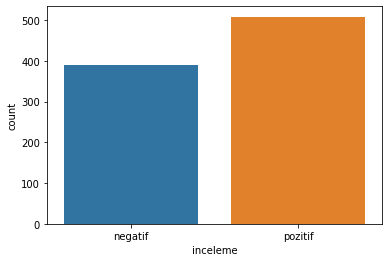

In [30]:
sns.countplot(df_Tweets.Tweets_duygu)
plt.xlabel('inceleme');

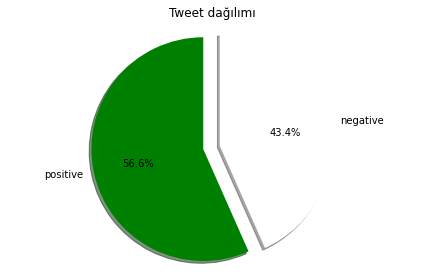

In [31]:
positive = (df_Tweets['Tweets_duygu'] == 'pozitif').sum()
negative = (df_Tweets['Tweets_duygu'] == 'negatif').sum()


proportions = [positive, negative]

plt.pie(
    proportions,
    labels = ['positive', 'negative'],
    shadow =0.9,
    colors = ['green','#ffffff'],
    explode = (0.15 , 0),
    startangle = 90,
    autopct = '%1.1f%%'
    )

plt.axis('equal')
plt.title("Tweet dağılımı")

plt.tight_layout()
plt.show()